# STA130 Homework 08


## Pre-lecture HW

## 1
#### Definition
A classification decision tree is a machine learning model used to categorize data into predefined classes or categories. In statistics, a Classification Decision Tree addresses problems of categorical prediction or classification.

#### Real-world Application
Healthcare:
- Predicting whether a patient has a disease based on symptoms and medical history.
    - Classifying patients as "diabetic" or "non-diabetic" based on age, BMI, blood pressure, and glucose levels.

Finance:
- Addresing credit risk:
    - Predicting whether a loan applicant is a "high risk" or "low risk" borrower based on credit history, income, and employment status.
    
Education:
- Predicting student outcomes
    - Determining whether a student will "pass" or "fail" a course based on attendance, assignment scores, and participation levels.

#### Key Differences in How a Classification Decision Tree and Multiple Linear Regression Make Predictions
| Aspect                          | Classification Decision Tree                                      | Multiple Linear Regression                                      |
|---------------------------------|-------------------------------------------------------------------|-----------------------------------------------------------------|
| **Problem Type**                | Classification (categorical outcomes).                           | Regression (continuous outcomes).                              |
| **Output**                      | Predicts a class label (e.g., Yes/No, A/B/C).                    | Predicts a numerical value.                                    |
| **Model Structure**             | A tree-like structure where splits are based on feature thresholds. | A linear equation with coefficients for each feature.          |
| **Decision Process**            | Recursive binary splits that map observations to class labels.   | Computes a weighted sum of predictors to estimate the response.|
| **Key Metrics**                 | Uses metrics like Gini impurity or entropy to split nodes.       | Uses metrics like Mean Squared Error (MSE) to estimate parameters.|


## 2

### Accuracy:
Measures the overall proportion of correct predictionsout of all predictions:
- Best used when false positives and false negatives have similar consequences, and the dataset is balanced
- RWE: Incorrectly labeling a spam email as non-spam and vice versa has roughly equal consequences, accuracy is a good metric to evaluate the model

### Sensitivity:
Measures the proportion of actual positives that are correctly identified by the model:
- When missing true positives is more critical than falsely identifying negatives.
- RWE: In cancer screening, a high sensitivity ensures that most patients with cancer are correctly identified, even at the cost of some false positives

### Specificity:
Measures the proportion of actual negatives that are correctly identified as such:
- When avoiding false positives is crucial.
- RWE: A high specificity is important to minimize the number of healthy individuals falsely diagnosed as HIV-positive

### Precision:
Measures the proportion of positive predictions that are actually correct:
- When avoiding false positives is more important than identifying all true positives.
- RWE: In credit card fraud detection, high precision ensures that flagged transactions are very likely to be fraudulent, reducing the inconvenience caused to legitimate customers by false alarms.

## 3

In [15]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

In [16]:
import pandas as pd
import numpy as np

# Load dataset
url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")

# Remove 'Weight_oz', 'Width', and 'Height' columns
columns_to_remove = ['Weight_oz', 'Width', 'Height']
ab_reduced = ab.drop(columns=columns_to_remove)

# Drop rows with NaN entries and use `.copy()` to avoid SettingWithCopyWarning
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Set 'Pub year' and 'NumPages' to have type int
ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)

# Set 'Hard_or_Paper' to have type category
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

# Verify data types after preprocessing
print("\nData types after preprocessing:\n", ab_reduced_noNaN.dtypes)

# Perform standard EDA
print("\nBasic statistics:\n", ab_reduced_noNaN.describe(include='all'))
print("\nNumber of unique values per column:\n", ab_reduced_noNaN.nunique())
print("\nValue counts for 'Hard_or_Paper':\n", ab_reduced_noNaN['Hard_or_Paper'].value_counts())

# Check for correlations among numerical variables only
numeric_columns = ab_reduced_noNaN.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()
print("\nCorrelation matrix:\n", correlation_matrix)



Data types after preprocessing:
 Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object

Basic statistics:
                    Title        Author  List Price  Amazon Price  \
count                319           319  319.000000    319.000000   
unique               309           251         NaN           NaN   
top     The Great Gatsby  Jodi Picoult         NaN           NaN   
freq                   3             7         NaN           NaN   
mean                 NaN           NaN   18.362978     12.941034   
std                  NaN           NaN   13.976755     12.436673   
min                  NaN           NaN    1.500000      0.770000   
25%                  NaN           NaN   13.890000      8.600000   
50%                  NaN           NaN   15.000000     10.20

In [17]:
print("Remaining columns:", ab_reduced_noNaN.columns)
print("Missing values per column:\n", ab_reduced_noNaN.isnull().sum())
print("Data types:\n", ab_reduced_noNaN.dtypes)
print(ab_reduced_noNaN.head())
print("Value counts for 'Hard_or_Paper':\n", ab_reduced_noNaN['Hard_or_Paper'].value_counts())
print("Shape of the DataFrame:", ab_reduced_noNaN.shape)

Remaining columns: Index(['Title', 'Author', 'List Price', 'Amazon Price', 'Hard_or_Paper',
       'NumPages', 'Publisher', 'Pub year', 'ISBN-10', 'Thick'],
      dtype='object')
Missing values per column:
 Title            0
Author           0
List Price       0
Amazon Price     0
Hard_or_Paper    0
NumPages         0
Publisher        0
Pub year         0
ISBN-10          0
Thick            0
dtype: int64
Data types:
 Title              object
Author             object
List Price        float64
Amazon Price      float64
Hard_or_Paper    category
NumPages            int64
Publisher          object
Pub year            int64
ISBN-10            object
Thick             float64
dtype: object
                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3          

## 4

`y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']:`

This converts the Hard_or_Paper column into dummy (binary) variables. pd.get_dummies creates a DataFrame with columns for each category, and then `['H']` selects the column corresponding to the hardback (or hardcover) books. This results in a binary series (0 or 1), where `1` indicates that a book is hard cover and `0` indicates it is not.

`X = ab_reduced_noNaN[['List Price']]:`

This selects the List Price column as the feature (independent variable) to predict whether the book is hard cover or paperback.

Accuracy on test set: 0.84375


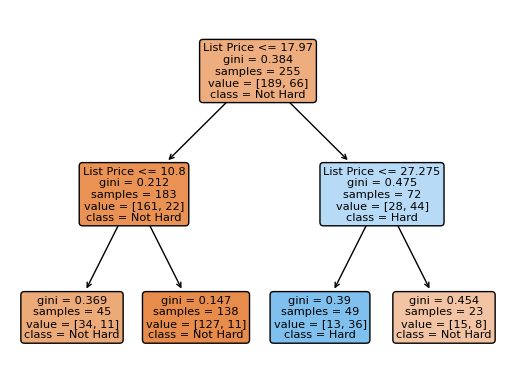

In [18]:
# Step 1: Prepare target and feature
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable
X = ab_reduced_noNaN[['List Price']]  # Feature variable

# Step 2: Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the DecisionTreeClassifier with max_depth=2
clf = tree.DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 4: Train the classifier
clf.fit(X_train, y_train)

# Step 5: Plot the decision tree
tree.plot_tree(clf, filled=True, feature_names=['List Price'], class_names=['Not Hard', 'Hard'], rounded=True)

# Step 6: Evaluate the classifier on the test set (optional, but useful for checking accuracy)
y_pred = clf.predict(X_test)
print("Accuracy on test set:", accuracy_score(y_test, y_pred))


In [19]:
print("Number of observations in the training set:", X_train.shape[0])
print("Number of observations in the test set:", X_test.shape[0])

Number of observations in the training set: 255
Number of observations in the test set: 64


`tree.plot_tree(clf)` is used to visualize the fitted decision tree, and helps explain how the model is making predictions based on the List Price

Each node will display the feature `(List Price)`, the threshold for splitting, and the class distribution at that node.

The leaf nodes will show the predicted class (e.g., `1` for hard cover, `0` for paperback) along with the proportion of samples in each class.

## Post-lecture HW

## 5

In [20]:
# Target variable
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for Hard, 0 for Paper

# Predictor variables for clf2
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Features

from sklearn.model_selection import train_test_split

# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

from sklearn import tree

# Initialize Decision Tree Classifier
clf2 = tree.DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the classifier
clf2.fit(X_train, y_train)


Training set size: (255, 3)
Test set size: (64, 3)


DecisionTreeClassifier(max_depth=4, random_state=42)

#### How predictions are made for the clf2 model:
Predictions for clf2 are made by traversing the tree from the root to a leaf node, following the decision rules at each node. It works by recursively splitting the dataset into subsets based on decision rules derived from the feature values (NumPages, Thick, and List Price in this case).

The tree consists of nodes:
- Root Node: The topmost node that considers all training data.
- Internal Nodes: Each internal node splits the data based on a decision rule for one feature.
- Leaf Nodes: The terminal nodes where the decision is made (classifies as either "Paper" or "Hard").

At each node:
- The algorithm chooses the feature and threshold that best separate the target classes (e.g., "Hard" vs. "Paper") based on measures like Gini Impurity or Entropy.

## 6

#### Define Positive and Negative Classes
- Positive class ("Hard"): Books with `Hard_or_Paper = "Hard"`.
- Negative class ("Not Hard"): Books with `Hard_or_Paper = "Paper"`.

#### Metrics from the confusion matrix
- True Positives (TP): Correctly predicted "Hard" books.
- True Negatives (TN): Correctly predicted "Not Hard" books.
- False Positives (FP): Predicted "Hard" when it’s actually "Not Hard."
- False Negatives (FN): Predicted "Not Hard" when it’s actually "Hard."

Decision Tree Classifier (clf):
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844
Decision Tree Classifier (clf2):
Sensitivity: 0.7
Specificity: 0.909
Accuracy: 0.844


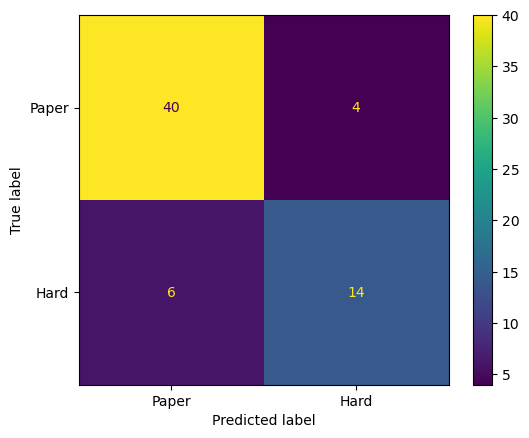

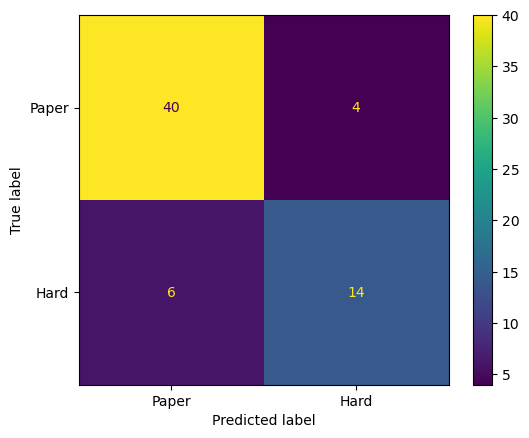

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

# Step 1: Prepare target and feature
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # Target variable (Hard = 1)
X = ab_reduced_noNaN[['List Price']]  # Feature variable

# Step 2: Split the data into training and testing sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize the DecisionTreeClassifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Step 4: Train the classifier
clf.fit(X_train, y_train)

# Step 5: Predict on the test set
y_pred = clf.predict(X_test)

# Step 6: Compute Confusion Matrix for clf
cm_clf = confusion_matrix(y_test, y_pred, labels=[0, 1])
TN, FP, FN, TP = cm_clf.ravel()

# Step 7: Calculate Sensitivity, Specificity, and Accuracy for clf
sensitivity_clf = TP / (TP + FN)
specificity_clf = TN / (TN + FP)
accuracy_clf = (TP + TN) / (TP + TN + FP + FN)

# Step 8: Print results for clf
print("Decision Tree Classifier (clf):")
print(f"Sensitivity: {np.round(sensitivity_clf, 3)}")
print(f"Specificity: {np.round(specificity_clf, 3)}")
print(f"Accuracy: {np.round(accuracy_clf, 3)}")

# Step 9: Display Confusion Matrix for clf
ConfusionMatrixDisplay(cm_clf, display_labels=["Paper", "Hard"]).plot()

# ---- Repeat for clf2 ----
# Assuming clf2 is another classifier model
clf2 = DecisionTreeClassifier(max_depth=3, random_state=42)
clf2.fit(X_train, y_train)
y_pred2 = clf2.predict(X_test)

# Compute Confusion Matrix for clf2
cm_clf2 = confusion_matrix(y_test, y_pred2, labels=[0, 1])
TN2, FP2, FN2, TP2 = cm_clf2.ravel()

# Calculate Sensitivity, Specificity, and Accuracy for clf2
sensitivity_clf2 = TP2 / (TP2 + FN2)
specificity_clf2 = TN2 / (TN2 + FP2)
accuracy_clf2 = (TP2 + TN2) / (TP2 + TN2 + FP2 + FN2)

# Print results for clf2
print("Decision Tree Classifier (clf2):")
print(f"Sensitivity: {np.round(sensitivity_clf2, 3)}")
print(f"Specificity: {np.round(specificity_clf2, 3)}")
print(f"Accuracy: {np.round(accuracy_clf2, 3)}")

# Display Confusion Matrix for clf2
ConfusionMatrixDisplay(cm_clf2, display_labels=["Paper", "Hard"]).plot()


## 7

In [ ]:
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(ab_reduced_noNaN_train[['List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()
ConfusionMatrixDisplay(
    confusion_matrix(ab_reduced_noNaN_train.life_exp_good, 
                     clf.predict(
                         ab_reduced_noNaN_train[['NumPages','Thick','List Price']]), 
                     labels=[0, 1]), display_labels=["Paper","Hard"]).plot()

#### Limitations of these models:
The first model uses only the List Price feature for prediction. If the relationship between List Price and the target variable (Hard_or_Paper) is weak, the model might not perform very well.

The second model uses additional features such as NumPages and Thick, alongside List Price. These additional features provide more predictive power and better correlate with the target variable

Furthermore, a low max_depth means the tree can only create very simple rules, which might not capture the intricacies in the data. A slightly deeper tree may have more flexibility and be able to capture more complex relationships between features and the target variable, leading to better performance.

If the target variable (Hard_or_Paper) is imbalanced (e.g., a majority of "Paper" instances and a minority of "Hard"), the confusion matrix for both models might show a bias towards the majority class. Class imbalance might be affecting how each model classifies the minority class.

#### Why the models above are better:
- clf uses List Price, and clf2 uses List Price, NumPages, and Thick which are much more precise and well chosen, leading to better predictions.
- It uses a appropriate `max_depth` which allows each model to be complex enough to capture the necessary patterns in the data without overfitting
- The confusion matrices for clf and clf2 are visualized properly with ConfusionMatrixDisplay